In [79]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf


import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
# Import our input dataset
suicide_df = pd.read_csv('Resources/Suicide_Final_Avg.csv')
suicide_df.head()

,LocationTime,Suicide_Val_TOT,Alcohol_Val,Edu_Sec_Val,Edu_Try_Val,Emp_Val,Healthy_Spend_Val,Obesity_Val,Smoking_Val,Soc_Spend_Val,Work_Hour_Val
0,ARG-1990,9.3,9.5,52.0,31.3,84.0,25.8,34.3,20.4,3.7,1854.0
1,ARG-1991,8.2,8.4,53.6,30.8,84.0,26.1,61.8,13.4,3.7,1845.6
2,ARG-1992,9.0,8.2,61.8,33.0,86.7,25.5,59.4,12.1,2.0,1855.7
3,ARG-1993,9.3,7.5,59.4,33.7,87.2,24.6,45.8,11.3,1.9,1874.2
4,ARG-1994,8.7,10.0,45.8,36.1,87.5,24.3,52.3,10.8,1.9,1870.3


In [81]:
# Check datatypes
suicide_df.dtypes

LocationTime          object
Suicide_Val_TOT      float64
Alcohol_Val          float64
Edu_Sec_Val          float64
Edu_Try_Val          float64
Emp_Val              float64
Healthy_Spend_Val    float64
Obesity_Val          float64
Smoking_Val          float64
Soc_Spend_Val        float64
Work_Hour_Val        float64
dtype: object

In [82]:
# Finding out the correlation between the features
corr = suicide_df.corr()
corr.shape

(10, 10)

<AxesSubplot:>

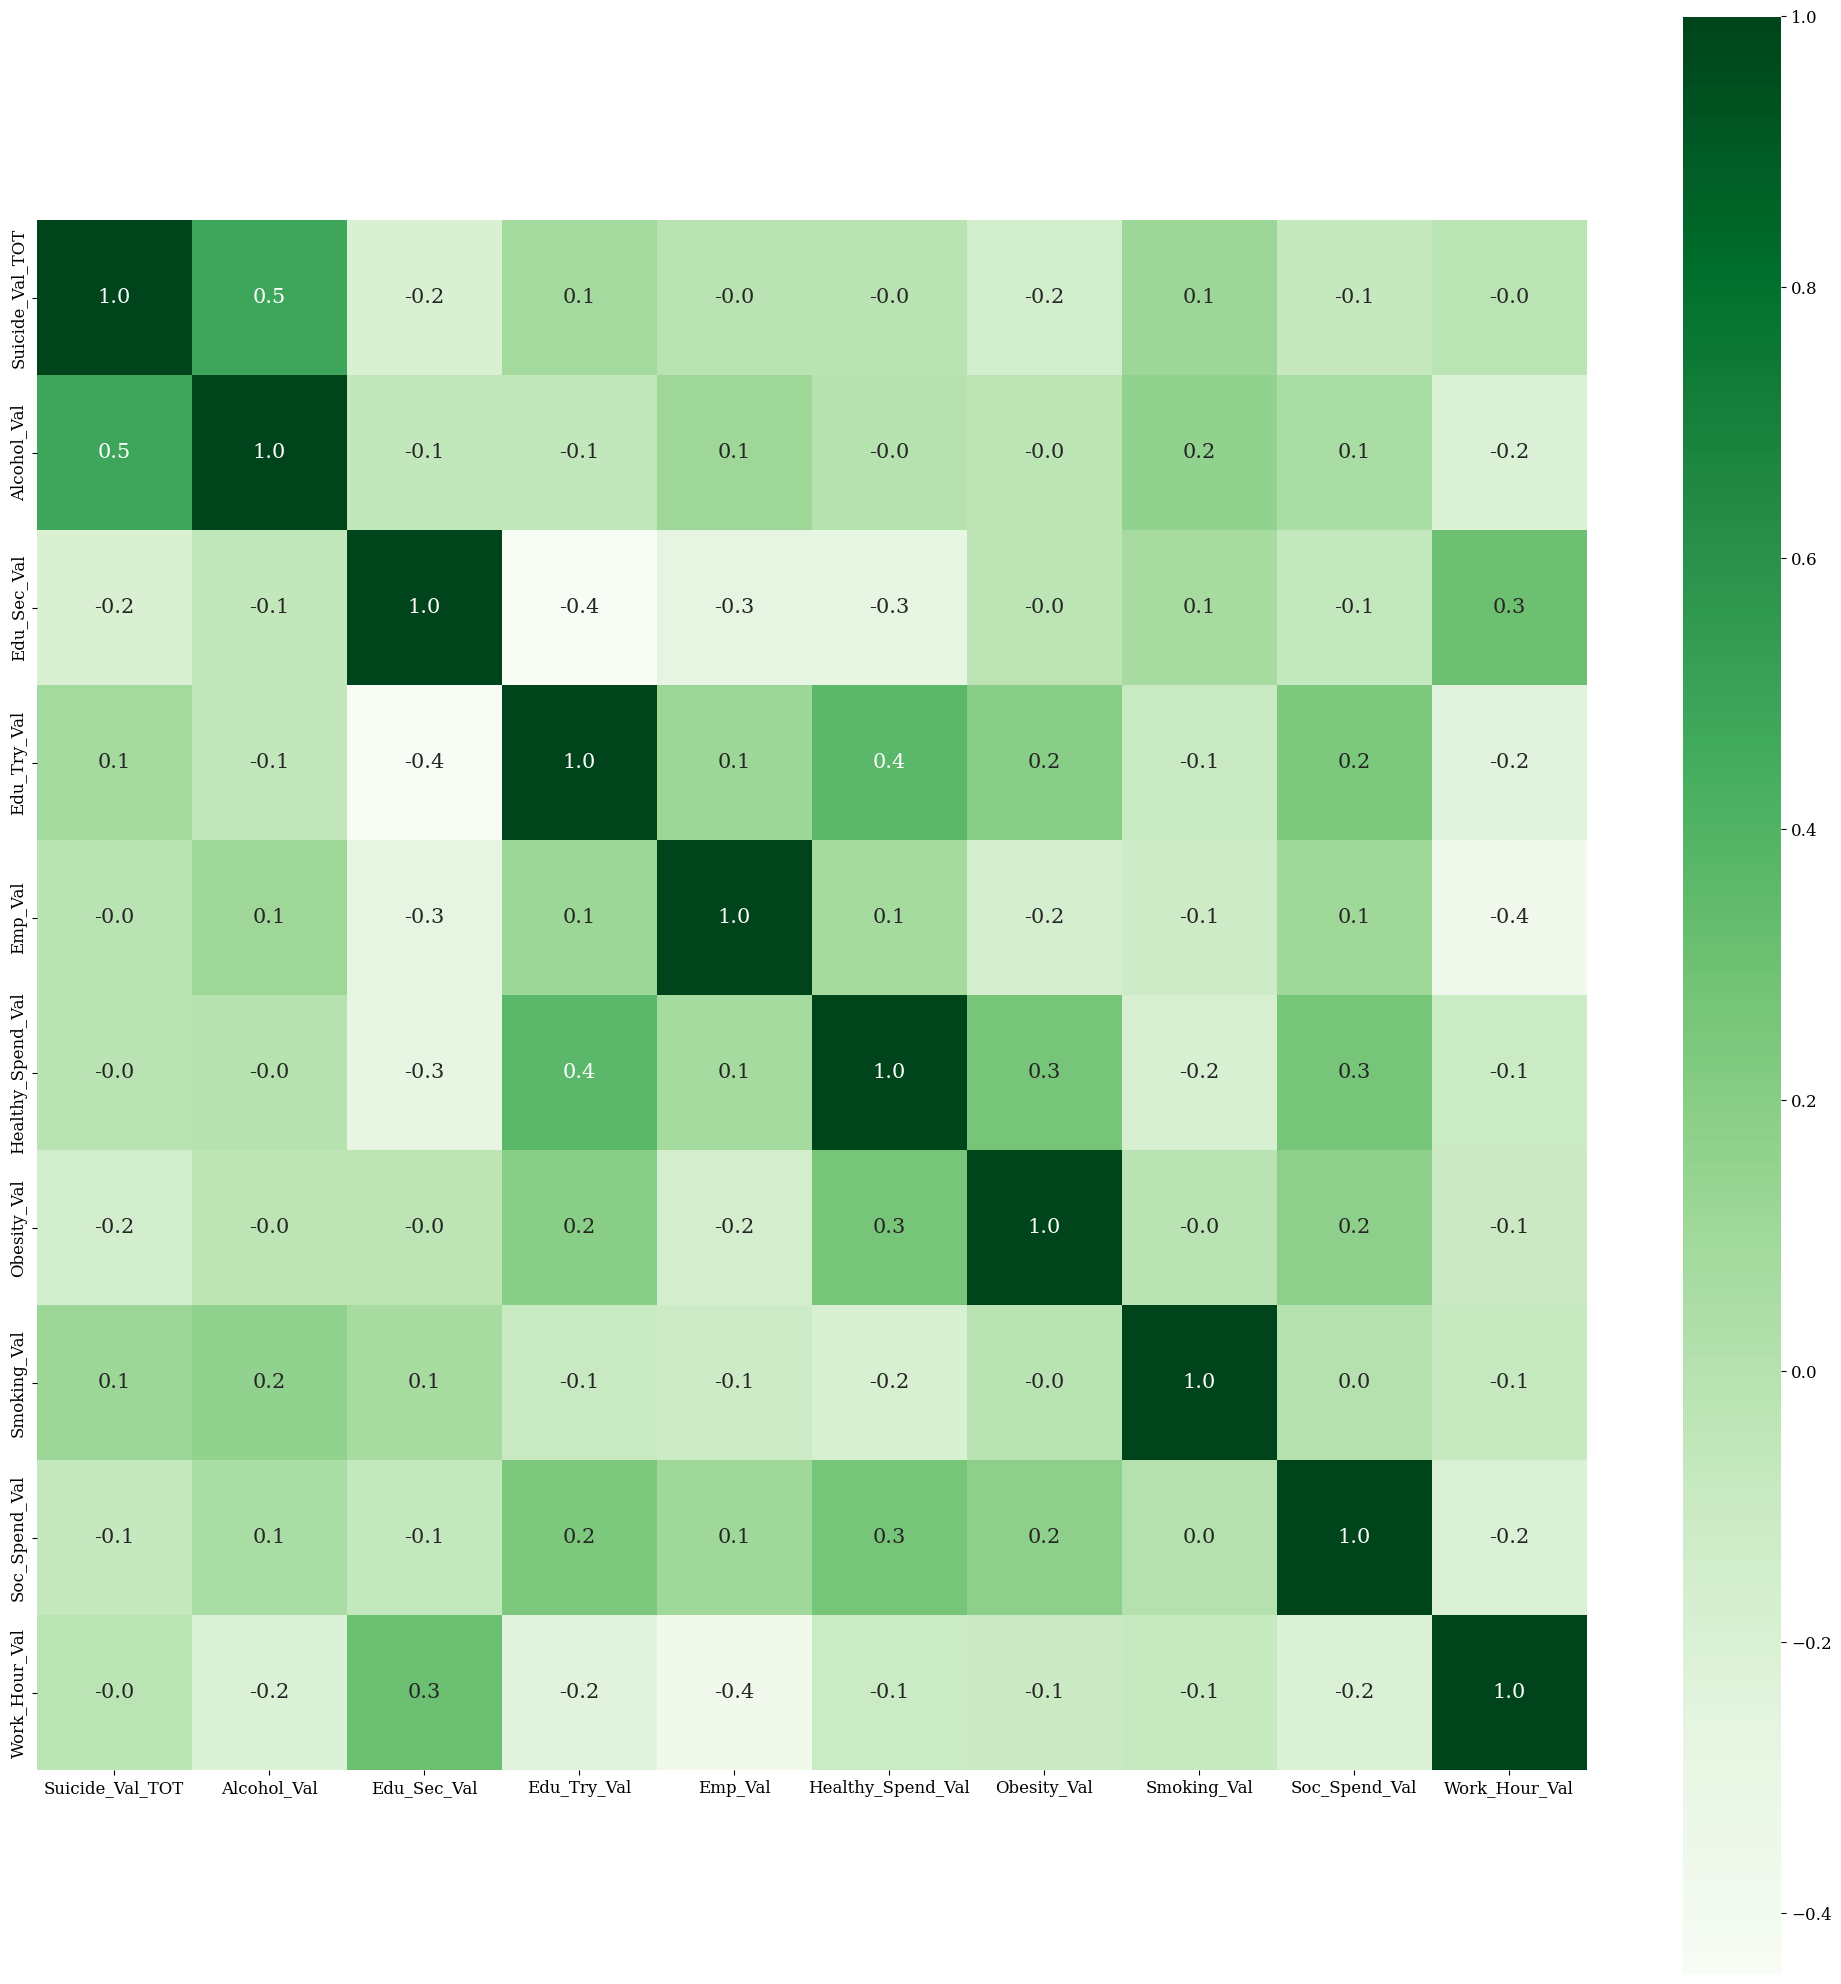

In [83]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [84]:
# Spliting target variable and independent variables
X = suicide_df.drop(['Suicide_Val_TOT', 'LocationTime'], axis = 1)
y = suicide_df['Suicide_Val_TOT']

In [85]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [86]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor(n_estimators=100)

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

In [87]:
# Model Evaluation
# Model prediction on train data
y_pred = reg.predict(X_train)

In [88]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9652538447944125
Adjusted R^2: 0.964914305818462
MAE: 0.9089613319011814
MSE: 2.6715174704618705
RMSE: 1.6344777363004583


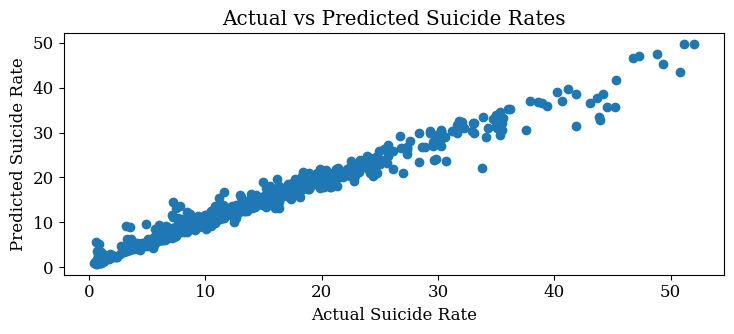

In [89]:
# Visualizing the differences between actual suicide rates and predicted suicide rates
plt.scatter(y_train, y_pred)
plt.xlabel("Actual Suicide Rate")
plt.ylabel("Predicted Suicide Rate")
plt.title("Actual vs Predicted Suicide Rates")
plt.show()

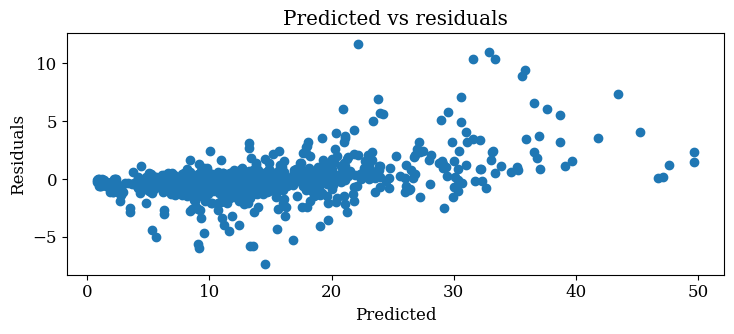

In [90]:
# Checking residuals, Error of models prediction
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()




In [91]:
# For test data

# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [92]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8125783127299654
Adjusted R^2: 0.8082531968698876
MAE: 2.216992500000001
MSE: 14.844664972500004
RMSE: 3.852877492537234


In [93]:
# Get the feature importance 
reg.feature_importances_

array([0.32722787, 0.05404983, 0.05315537, 0.14726704, 0.06368438,
       0.07243646, 0.04602105, 0.11489573, 0.12126227])

In [94]:
# Built-In Feature importance 
suicide1_df = suicide_df.drop(columns=['LocationTime', 'Suicide_Val_TOT'])
cols = suicide1_df.columns
print(len(cols))
print(len(reg.feature_importances_))



9
9


Text(0, 0.5, 'Features')

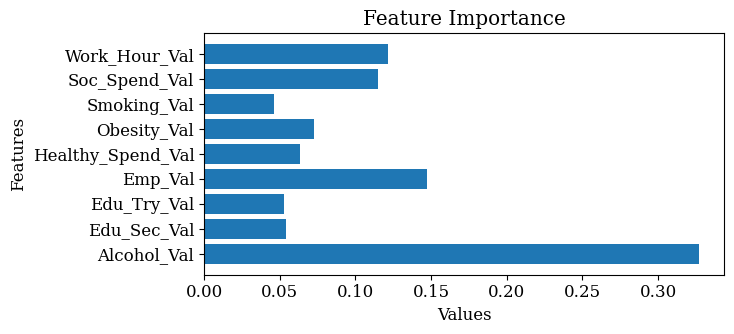

In [95]:

plt.barh(cols,reg.feature_importances_)
plt.title("Feature Importance")
plt.xlabel("Values")
plt.ylabel("Features")
#sorted(data, reverse=True)

{'Alcohol_Val': 0.3272278669944702, 'Edu_Sec_Val': 0.054049828172946936, 'Edu_Try_Val': 0.05315536936497726, 'Emp_Val': 0.14726703772161967, 'Healthy_Spend_Val': 0.06368438063347855, 'Obesity_Val': 0.07243645693752052, 'Smoking_Val': 0.046021053909673405, 'Soc_Spend_Val': 0.11489573379613346, 'Work_Hour_Val': 0.12126227246918014}


Text(0, 0.5, 'Features')

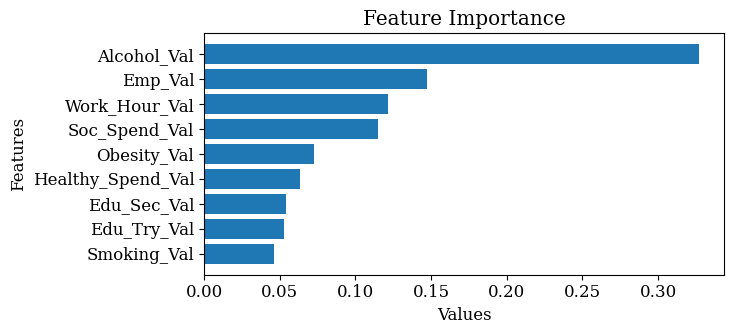

In [96]:
# Combine the two arrays into a dictionary
data = dict(zip(cols, reg.feature_importances_))

print(data)

# Sort the data in ascending order
sorted_data = dict(sorted(data.items(), key=lambda x: x[1]))

# Plot the data as a horizontal bar chart
plt.barh(list(sorted_data.keys()), sorted_data.values())

#plt.bar(sorted_data.keys(), sorted_data.values())
plt.title("Feature Importance")
plt.xlabel("Values")
plt.ylabel("Features")
